In [3]:
import pandas as pd
import numpy as np

In [5]:
df_animal = pd.read_csv('data/msleep.csv')

In [43]:
df_animal

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [39]:
df_animal.sleep_total.value_counts()

sleep_total
12.5    4
10.1    3
5.3     2
6.3     2
9.1     2
       ..
19.4    1
17.0    1
14.3    1
19.9    1
5.2     1
Name: count, Length: 65, dtype: int64

In [13]:
df_animal.vore.value_counts()

vore
herbi      32
omni       20
carni      19
insecti     5
Name: count, dtype: int64

In [73]:
df_animal.vore.value_counts().index[0]

'herbi'

In [19]:
df_animal.vore.value_counts(normalize=True)

vore
herbi      0.421053
omni       0.263158
carni      0.250000
insecti    0.065789
Name: proportion, dtype: float64

In [41]:
df_animal.vore.value_counts(ascending=False)

vore
herbi      32
omni       20
carni      19
insecti     5
Name: count, dtype: int64

In [23]:
df_animal.vore.value_counts(sort=False)

vore
carni      19
omni       20
herbi      32
insecti     5
Name: count, dtype: int64

In [7]:
df_animal[df_animal.vore == "insecti"]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.3,0.00030,0.023
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.1,0.00025,0.010
61,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NaN,5.9,0.08100,60.000
66,Eastern american mole,Scalopus,insecti,Soricomorpha,lc,8.4,2.1,0.166667,15.6,0.00120,0.075
74,Short-nosed echidna,Tachyglossus,insecti,Monotremata,NaN,8.6,NaN,NaN,15.4,0.02500,4.500


In [11]:
df_animal[df_animal.vore == "insecti"]["sleep_rem"].\
agg(["mean","median","var","std"]) #agg fonksiyonlarına bak

mean      3.525000
median    3.000000
var       3.709167
std       1.925920
Name: sleep_rem, dtype: float64

In [31]:
#add outlier
df_animal.loc[len(df_animal.index)] = \
["New Insect","","insecti","","", \
0.0,0.0,0.0,0.0,0.0,0.0]
df_animal

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380
82,Red fox,Vulpes,carni,Carnivora,NaN,9.8,2.4,0.350000,14.2,0.05040,4.230


In [41]:
range_sleep_total = df_animal.sleep_total.max()-\
df_animal.sleep_total.min()
range_sleep_total

18.0

In [23]:
np.var(df_animal.sleep_total, ddof=1) #default ->0 ddof -> 0 pop varyans ddof -> 1 sample(örneklem) varyans

19.805677343520422

In [49]:
np.sqrt(np.var(df_animal.sleep_total, ddof=1)) #varyansın karekökü sapmayı verir.

4.4503569905705795

In [19]:
np.std(df_animal.sleep_total, ddof=1) # sapmayı numpy içerisinden bu şekilde de bulabiliriz

4.4503569905705795

In [27]:
#mean absolute deviation #sapma ile aynı işi yapıyor fakat kare almak yerine mutlak değerini alıyoruz o veri seti içinde mean alıyoruz
dists = df_animal.sleep_total - \
np.mean(df_animal.sleep_total)

np.mean(np.abs(dists))

3.5667005370881117

In [57]:
np.quantile(df_animal.sleep_total,0.5) #median hesabı yapmış olduk

10.1

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7d0bee000>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7d0bee4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7d0bedd00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c7d0beea80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c7d0beed80>],
 'means': []}

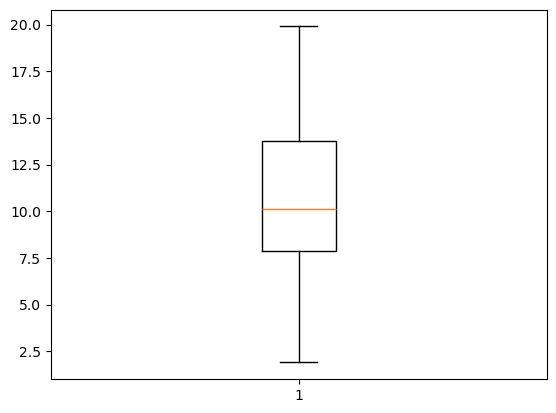

In [61]:
import matplotlib.pyplot as plt
plt.boxplot(df_animal.sleep_total)

In [63]:
np.quantile(df_animal.sleep_total,[0,0.20,0.4,0.6,0.8,1])

array([ 1.9 ,  6.24,  9.48, 11.14, 14.4 , 19.9 ])

In [65]:
np.quantile(df_animal.sleep_total,np.linspace(0,1,5)) #linespace(start,stop,how many parts)

array([ 1.9 ,  7.85, 10.1 , 13.75, 19.9 ])

In [15]:
from scipy.stats import iqr

In [17]:
iqr(df_animal.sleep_total)

5.9

In [19]:
iqr = iqr(df_animal.sleep_total) #Q3-Q1

lower_theresold = np.quantile(df_animal.bodywt,0.25) - 1.5 * iqr
upper_theresold = np.quantile(df_animal.bodywt,0.75) + 1.5 * iqr

#lower_theresold = df_animal.describe().bodywt['25%'] - 1.5 * iqr
#upper_theresold = df_animal.describe().bodywt['75%'] + 1.5 * iqr

df_animal[(df_animal.bodywt<lower_theresold) | (df_animal.bodywt>upper_theresold)] #outlier bulma

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.423,600.000
20,Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NaN,NaN,20.10,4.603,2547.000
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.10,0.655,521.000
23,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,NaN,20.90,0.419,187.000
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000
31,Gray seal,Haliochoerus,carni,Carnivora,lc,6.2,1.5,NaN,17.80,0.325,85.000
33,Human,Homo,omni,Primates,NaN,8.0,1.9,1.500000,16.00,1.320,62.000
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.70,5.712,6654.000
48,Sheep,Ovis,herbi,Artiodactyla,domesticated,3.8,0.6,NaN,20.20,0.175,55.500


<Axes: ylabel='bodywt'>

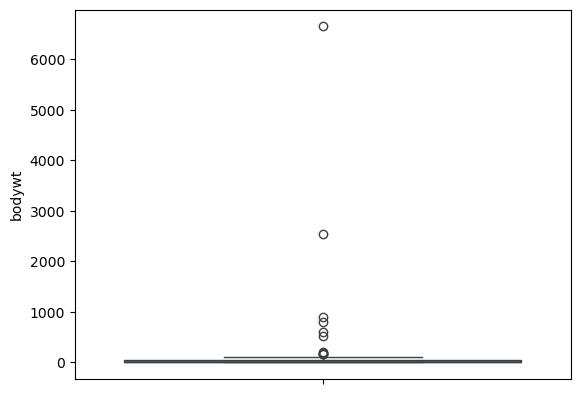

In [31]:
import seaborn as sns 

sns.boxplot(data = df_animal, y='bodywt')

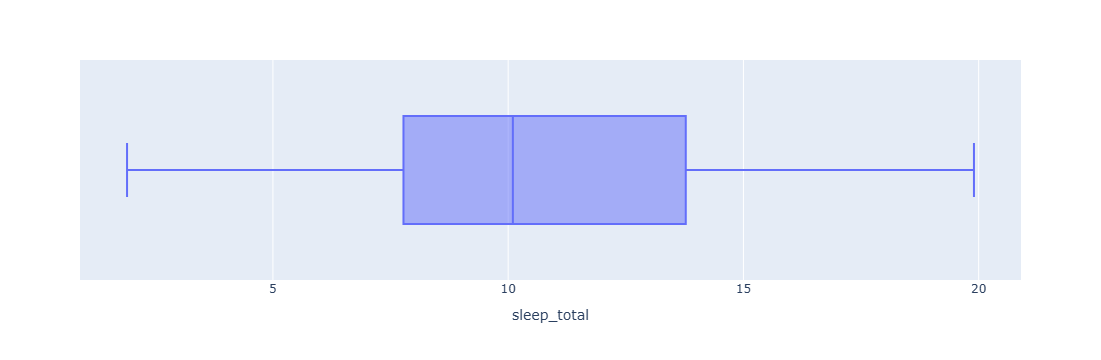

In [39]:
import plotly.express as px

px.box(df_animal,x='sleep_total')

In [ ]:
pandas.Series.value_counts() fonksiyonu, bir pandas serisi (veya DataFrame'deki bir sütun) içinde her benzersiz değerin kaç kez tekrarlandığını sayar 
ve bu sayıları azalan sırayla döndürür. Bu fonksiyon, verilerdeki kategorik dağılımı veya belirli değerlerin sıklığını analiz etmek için sıklıkla 
kullanılır. Ayrıca çeşitli parametrelerle işlevselliği genişletilebilir.

Parametreler
normalize: (bool, default = False)

Eğer True olarak ayarlanırsa, her değerin toplam içinde kapladığı oranı (yüzdelik) döndürür, sayılar yerine oranlar gösterilir.
Örnek:

df['age'].value_counts(normalize=True)  # Her yaşın toplamda kapladığı oranı döndürür
Örnek çıktı:
25    0.50
32    0.25
19    0.25
Name: age, dtype: float64
sort: (bool, default = True)

Eğer True ise, döndürülen değerleri frekansa göre azalan sırayla sıralar. False ise, değerlerin sıralamasını korur (girdi sırasına göre sıralar).
Örnek:

df['age'].value_counts(sort=False)  # Orijinal sıraya göre sıralar
ascending: (bool, default = False)

Eğer True ise, azalan sıraya değil artan sıraya göre sıralama yapılır (yani en az tekrar eden değerler en üstte olur).
Örnek:

df['age'].value_counts(ascending=True)  # Azdan çoğa doğru sıralar
bins: (int, default = None)

Sürekli verilerde (örneğin sayısal verilerde) veriyi belirli aralıklara (binlere) ayırır. 
Bu özellikle büyük veri setlerinde, değerleri kategorilere ayırmak ve her kategorinin sıklığını görmek için kullanılır.
Örnek:

df['age'].value_counts(bins=3)  # Yaş verisini 3 gruba ayırır
Örnek çıktı:

(18.987, 23.333]    1
(23.333, 27.667]    2
(27.667, 32.0]      1
Name: age, dtype: int64
dropna: (bool, default = True)

NaN değerlerini frekans hesaplamalarından çıkarır. Eğer False olarak ayarlanırsa, NaN değerlerini de sıklık tablosuna dahil eder.
Örnek:

df['age'].value_counts(dropna=False)  # NaN değerlerini sıklık tablosuna dahil eder
Örneklerle Açıklamalar
Örnek 1: Temel Kullanım

import pandas as pd

data = {'age': [25, 32, 19, 25, 25, 32]}
df = pd.DataFrame(data)

# Yaş sütunundaki değerlerin kaç kez tekrarlandığını bulma
age_counts = df['age'].value_counts()
print(age_counts)
Çıktı:

25    3
32    2
19    1
Name: age, dtype: int64
Örnek 2: Yüzdelik Oranlarla Frekanslar

age_normalized = df['age'].value_counts(normalize=True)
print(age_normalized)
Çıktı:

25    0.50
32    0.33
19    0.17
Name: age, dtype: float64
Örnek 3: Artan Sıralama

age_sorted = df['age'].value_counts(ascending=True)
print(age_sorted)
Çıktı:

19    1
32    2
25    3
Name: age, dtype: int64
Örnek 4: Sürekli Verileri Aralıklara (Bins) Ayırma

age_binned = df['age'].value_counts(bins=2)
print(age_binned)
Çıktı:

(18.987, 25.5]    4
(25.5, 32.0]      2
Name: age, dtype: int64
Bu örnekte, bins=2 parametresi kullanılarak yaşlar iki gruba ayrılmıştır: 18.987 - 25.5 ve 25.5 - 32.0 aralıkları.

Örnek 5: NaN Değerlerini Dahil Etme

data = {'age': [25, 32, 19, 25, None, 32]}
df = pd.DataFrame(data)

age_with_nan = df['age'].value_counts(dropna=False)
print(age_with_nan)
Çıktı:

25.0    2
32.0    2
19.0    1
NaN     1
Name: age, dtype: int64
Bu örnekte, None değerini sıklık tablosuna dahil ettik.

Özet
value_counts() bir serideki veya sütundaki benzersiz değerlerin sıklığını hesaplar.
Parametrelerle frekansların yüzdelik oranlarını hesaplayabilir, NaN değerleri dahil edebilir, verileri aralıklara bölebilir 
ve sıralama ayarlarını değiştirebilirsiniz.

In [ ]:
loc ve iloc, pandas kütüphanesinde veri seçmek ve dilimlemek için kullanılan iki önemli yöntemdir. 
Her ikisi de satır ve sütun bazında veri erişimi sağlar ancak temel farkları şudur
: loc etiketlere göre, iloc ise konumlara (indekslere) göre seçim yapar.

1. loc (Label-based indexing):
Etikete dayalı veri seçimi yapar. Satır ve sütun isimlerini kullanarak belirli verilere erişmek mümkündür.
Başlangıç ve bitiş etiketleri dahildir.
Sıralı ve sırasız indeksler (etiketler) ile çalışabilir.
Kullanım:
python
Kodu kopyala
df.loc[rows, columns]
Örnekler:
python
Kodu kopyala
import pandas as pd

# Örnek DataFrame
data = {'name': ['Ali', 'Ayşe', 'Veli', 'Fatma'],
        'age': [25, 23, 32, 29],
        'city': ['İstanbul', 'Ankara', 'İzmir', 'Bursa']}
df = pd.DataFrame(data)

# 1. 'name' etiketi 'Ali' olan satırı seçme
result = df.loc[0]  # 0 indeksine sahip satır
print(result)

# 2. 'age' sütunundaki verileri seçme
result = df.loc[:, 'age']
print(result)

# 3. 'name' ve 'city' sütunlarını seçme
result = df.loc[:, ['name', 'city']]
print(result)

# 4. Belirli satır ve sütun dilimleme
result = df.loc[0:2, ['name', 'city']]  # 0'dan 2'ye kadar olan satırlar
print(result)
Çıktılar:
yaml
Kodu kopyala
name         Ali
age           25
city    İstanbul
Name: 0, dtype: object

0    25
1    23
2    32
3    29
Name: age, dtype: int64

    name      city
0    Ali  İstanbul
1   Ayşe    Ankara
2   Veli     İzmir
3  Fatma     Bursa

   name      city
0   Ali  İstanbul
1  Ayşe    Ankara
2  Veli     İzmir
2. iloc (Integer-based indexing):
Konuma dayalı veri seçimi yapar. Satır ve sütun indekslerini (sayısal konumları) kullanarak veri erişimi sağlar.
Başlangıç dahil, bitiş hariçtir (Python dilimleme kurallarına uyar).
Sadece tamsayı indeksleri ile çalışır.
Kullanım:
python
Kodu kopyala
df.iloc[rows, columns]
Örnekler:
python
Kodu kopyala
# 1. 0. satırı seçme
result = df.iloc[0]  # 0 indeksindeki satırı seçer
print(result)

# 2. Yaş sütununu seçme (tüm satırlardan)
result = df.iloc[:, 1]  # 1. sütunu seçer
print(result)

# 3. 0. ve 2. sütunları seçme
result = df.iloc[:, [0, 2]]  # 0. ve 2. sütunlar
print(result)

# 4. 0'dan 2'ye kadar olan satırları ve 0. ve 2. sütunları seçme
result = df.iloc[0:3, [0, 2]]  # 0'dan 3'e kadar olan satırlar (3 hariç) ve 0, 2 sütunlar
print(result)
Çıktılar:
yaml
Kodu kopyala
name         Ali
age           25
city    İstanbul
Name: 0, dtype: object

0    25
1    23
2    32
3    29
Name: age, dtype: int64

    name      city
0    Ali  İstanbul
1   Ayşe    Ankara
2   Veli     İzmir
3  Fatma     Bursa

   name      city
0   Ali  İstanbul
1  Ayşe    Ankara
2  Veli     İzmir
Özet
Özellik	loc	iloc
Seçim Türü	Etiket (label) bazlı	Konum (index) bazlı
Kapsam	Başlangıç ve bitiş dahil	Başlangıç dahil, bitiş hariç
Çalıştığı Veriler	İndeksler ve sütun isimleri ile çalışır	Sadece tamsayı indeksleri ile çalışır
Kullanım	df.loc[rows, columns]	df.iloc[rows, columns]
Bu iki yöntem, hangi veri kümesine nasıl erişeceğinize göre esneklik sağlar. loc daha açıklayıcıdır çünkü etiketlerle çalışır, 
      iloc ise belirli konumlardan hızlı ve güvenilir bir şekilde veri almanızı sağlar.